# Linear Regression
In this exercise, you will implement linear regression and get to see it work on data.
The first part of the excercise gives you practice with Python syntax. Next, you will find the outline of a function. Modify it to return a 5 x 5 identity matrix by filling in the following code:
A = np.eye(5);

Remember: We usually use lowercase letters for vectors and uppercase letters for matrices

In [69]:
import numpy as np
import matplotlib.pyplot as plt
A=np.eye(5)#put the code here#
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.


In [70]:
data = np.genfromtxt('ex1data1.txt', delimiter=',') #load the data
x = data[:, 0] # population
y = data[:, 1] # profit
m = len(y)     # number of samples 

#Just for indexing purposes
x = x.reshape(m,1)
y = y.reshape(m,1)

Text(0.5, 0, 'Population of City in 10,000s')

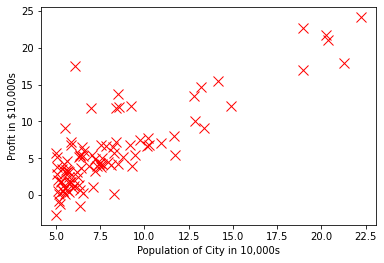

In [71]:
plt.plot(x, y, 'rx', markersize=10) #Plot the data 
plt.ylabel('Profit in $10,000s') #Set the y−axis label 
plt.xlabel('Population of City in 10,000s') # Set the x−axis label


## Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

### Update Equations
The objective of linear regression is to minimize the cost function

$$ J(\theta)= \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})−y^{(i)})^2 $$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x)=\theta^Tx=\theta_0 + \theta_1x_1 $$
Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update
$$\theta_j := \theta_j − \alpha\frac{1}{m}\sum_{i=1}^{m} (h_\theta(x^{(i)}) − y^{(i)})x^{(i)} \mathrm{(simultaneously ~ update ~} \theta_j \mathrm{~ for ~ all ~} j\mathrm{).} $$
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.


In [72]:
def computeCost(X, y, theta):
    ''' COMPUTECOST Compute cost for linear regression
        J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
        parameter for linear regression to fit the data points in X and y
        X, y, and theta are numpy arrays/matrices
    '''

    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.

    h = np.dot(X,theta)
    dif = h - y
    J = (1/(2*m)) * np.dot(dif.T,dif)

    return J.item()


In [73]:
X = np.concatenate((np.ones((m,1)), x), axis=1) # Add a column of ones to x
theta = np.zeros((2,1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
computeCost(X, y, theta)
# You should expect to see a cost of 32.07.

32.072733877455676

In [74]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''GRADIENTDESCENT Performs gradient descent to learn theta
        theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
        taking num_iters gradient steps with learning rate alpha
    '''

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in range(num_iters):

        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector theta. 
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.

        h = np.dot(X,theta)
        dif = h - y
        theta[0] = theta[0] - alpha * 1/m * np.dot(dif.T,X[:,0])
        theta[1] = theta[1] - alpha * 1/m * np.dot(dif.T,X[:,1])

        # ============================================================
        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta)
    return theta, J_history

Theta found by gradient descent: 
[-3.63029144] [1.16636235]
For population = 35,000, we predict a profit of  [4519.7678677]
For population = 70,000, we predict a profit of  [45342.45012945]


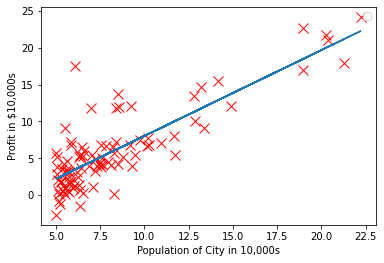

In [75]:
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: ')
print(theta[0], theta[1])

# Plot again the values
plt.plot(x, y, 'rx', markersize=10) #Plot the data 
plt.ylabel('Profit in $10,000s') #Set the y−axis label 
plt.xlabel('Population of City in 10,000s') # Set the x−axis label
# Plot the linear fit
plt.plot(X[:,1], np.dot(X,theta), '-')
plt.legend('Training data', 'Linear regression')

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5],theta)
print('For population = 35,000, we predict a profit of ', predict1*10000);
predict2 = np.dot([1, 7],theta)
print('For population = 70,000, we predict a profit of ', predict2*10000);



## Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

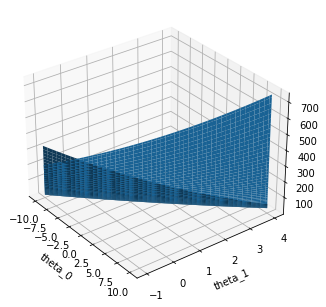

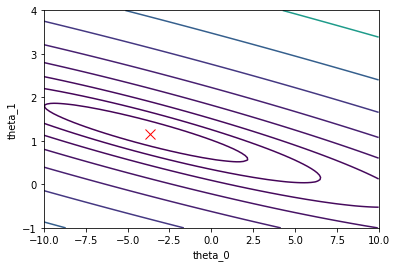

In [87]:
from mpl_toolkits.mplot3d import Axes3D

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
	    t = np.array([theta0_vals[i], theta1_vals[j]])
	    J_vals[i,j] = computeCost(X, y, t.reshape(2,1))

# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T
# Surface plot
fig = plt.figure()
ax = Axes3D(fig,azim=-37.5, elev=30)
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')

# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.figure()
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
